# Flight Delay Prediction

Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 500)
plt.style.use("seaborn-colorblind")
pal = sns.color_palette()


In [ ]:
csv_files = glob.glob("C:/Users/T M Vishwanath reddy/BIA 678 Final Project/archive/*.csv")

Reading the datasets, we have flight data fro the years 2021 and 2022 

In [ ]:
data_2021 = pd.read_csv("C:/Users/T M Vishwanath reddy/BIA 678 Final Project/archive/Combined_Flights_2021.csv")
data_2022 = pd.read_csv("C:/Users/T M Vishwanath reddy/BIA 678 Final Project/archive/Combined_Flights_2022.csv")

### Data Pre-processing for the year 2021

In [ ]:
data_2021.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,724,714.0,0.0,-10.0,818.0,0.0,49.0,79.0,64.0,262.0,2021,1,3,3,3,AA,AA_CODESHARE,19805,AA,3133,OO,20304,OO,N728SK,3133,14794,1479405,34794,"St. George, UT",UT,49,Utah,87,14107,1410702,30466,"Phoenix, AZ",AZ,4,Arizona,81,0.0,-1.0,0700-0759,10.0,724.0,813.0,5.0,843,-25.0,0.0,-2.0,0800-0859,2,0.0
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,922,917.0,0.0,-5.0,1031.0,0.0,48.0,78.0,74.0,262.0,2021,1,3,3,3,AA,AA_CODESHARE,19805,AA,3134,OO,20304,OO,N752SK,3134,14107,1410702,30466,"Phoenix, AZ",AZ,4,Arizona,81,14794,1479405,34794,"St. George, UT",UT,49,Utah,87,0.0,-1.0,0900-0959,23.0,940.0,1028.0,3.0,1040,-9.0,0.0,-1.0,1000-1059,2,0.0
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,1330,1321.0,0.0,-9.0,1501.0,0.0,129.0,180.0,160.0,843.0,2021,1,3,3,3,AA,AA_CODESHARE,19805,AA,3135,OO,20304,OO,N766SK,3135,13296,1329604,30721,"Manchester, NH",NH,33,New Hampshire,14,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,0.0,-1.0,1300-1359,15.0,1336.0,1445.0,16.0,1530,-29.0,0.0,-2.0,1500-1559,4,0.0
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,1645,1636.0,0.0,-9.0,2002.0,0.0,112.0,145.0,146.0,868.0,2021,1,3,3,3,AA,AA_CODESHARE,19805,AA,3136,OO,20304,OO,N752EV,3136,11298,1129806,30194,"Dallas/Fort Worth, TX",TX,48,Texas,74,15323,1532305,35323,"Bristol/Johnson City/Kingsport, TN",TN,47,Tennessee,54,0.0,-1.0,1600-1659,27.0,1703.0,1955.0,7.0,2010,-8.0,0.0,-1.0,2000-2059,4,0.0
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,1844,1838.0,0.0,-6.0,1903.0,0.0,69.0,101.0,85.0,425.0,2021,1,3,3,3,AA,AA_CODESHARE,19805,AA,3137,OO,20304,OO,N715SK,3137,14107,1410702,30466,"Phoenix, AZ",AZ,4,Arizona,81,10561,1056103,30561,"Bakersfield, CA",CA,6,California,91,0.0,-1.0,1800-1859,13.0,1851.0,1900.0,3.0,1925,-22.0,0.0,-2.0,1900-1959,2,0.0


In [ ]:
data_2021 = data_2021.loc[:, ["FlightDate","Airline","Tail_Number","Flight_Number_Marketing_Airline","Origin",\
    "Dest", "Cancelled", "Diverted","CRSDepTime", "DepTime", "DepDelayMinutes", "OriginAirportID",\
    "OriginCityName", "OriginStateName","DestAirportID", "DestCityName",\
    "DestStateName","TaxiOut", "TaxiIn","CRSArrTime","ArrTime","ArrDelayMinutes"]]

In [ ]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311871 entries, 0 to 6311870
Data columns (total 22 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   FlightDate                       object 
 1   Airline                          object 
 2   Tail_Number                      object 
 3   Flight_Number_Marketing_Airline  int64  
 4   Origin                           object 
 5   Dest                             object 
 6   Cancelled                        bool   
 7   Diverted                         bool   
 8   CRSDepTime                       int64  
 9   DepTime                          float64
 10  DepDelayMinutes                  float64
 11  OriginAirportID                  int64  
 12  OriginCityName                   object 
 13  OriginStateName                  object 
 14  DestAirportID                    int64  
 15  DestCityName                     object 
 16  DestStateName                    object 
 17  TaxiOut 

In [ ]:
data_2021.isnull().values.any()

True

In [ ]:
data_2021.isnull().sum()

FlightDate                              0
Airline                                 0
Tail_Number                         23303
Flight_Number_Marketing_Airline         0
Origin                                  0
Dest                                    0
Cancelled                               0
Diverted                                0
CRSDepTime                              0
DepTime                            108325
DepDelayMinutes                    108413
OriginAirportID                         0
OriginCityName                          0
OriginStateName                         0
DestAirportID                           0
DestCityName                            0
DestStateName                           0
TaxiOut                            110353
TaxiIn                             112425
CRSArrTime                              0
ArrTime                            112408
ArrDelayMinutes                    126001
dtype: int64

In [ ]:
# dropping the rows having NaN values
data_2021 = data_2021.dropna()
 
# To reset the indices
data_2021 = data_2021.reset_index(drop = True)

In [ ]:
data_2021.isnull().sum()

FlightDate                         0
Airline                            0
Tail_Number                        0
Flight_Number_Marketing_Airline    0
Origin                             0
Dest                               0
Cancelled                          0
Diverted                           0
CRSDepTime                         0
DepTime                            0
DepDelayMinutes                    0
OriginAirportID                    0
OriginCityName                     0
OriginStateName                    0
DestAirportID                      0
DestCityName                       0
DestStateName                      0
TaxiOut                            0
TaxiIn                             0
CRSArrTime                         0
ArrTime                            0
ArrDelayMinutes                    0
dtype: int64

In [ ]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6185870 entries, 0 to 6185869
Data columns (total 22 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   FlightDate                       object 
 1   Airline                          object 
 2   Tail_Number                      object 
 3   Flight_Number_Marketing_Airline  int64  
 4   Origin                           object 
 5   Dest                             object 
 6   Cancelled                        bool   
 7   Diverted                         bool   
 8   CRSDepTime                       int64  
 9   DepTime                          float64
 10  DepDelayMinutes                  float64
 11  OriginAirportID                  int64  
 12  OriginCityName                   object 
 13  OriginStateName                  object 
 14  DestAirportID                    int64  
 15  DestCityName                     object 
 16  DestStateName                    object 
 17  TaxiOut 

### Data Pre-processing for the year 2022

In [ ]:
data_2022.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,1228.0,0.0,40.0,72.0,65.0,212.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4301,C5,20445,C5,N21144,4301,11921,1192102,31921,"Grand Junction, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-1.0,1100-1159,17.0,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,848.0,0.0,55.0,77.0,80.0,295.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4299,C5,20445,C5,N16170,4299,12206,1220605,32206,"Harlingen/San Benito, TX",TX,48,Texas,74,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,0.0,-1.0,0700-0759,16.0,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,1636.0,0.0,47.0,70.0,82.0,251.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4298,C5,20445,C5,N21144,4298,11413,1141307,30285,"Durango, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-1.0,1500-1559,21.0,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,1547.0,0.0,57.0,90.0,77.0,376.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4296,C5,20445,C5,N11184,4296,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,11973,1197302,31973,"Gulfport/Biloxi, MS",MS,28,Mississippi,53,0.0,-1.0,1400-1459,16.0,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,1251.0,6.0,49.0,70.0,76.0,251.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4295,C5,20445,C5,N17146,4295,11413,1141307,30285,"Durango, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,0.0,1100-1159,19.0,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


In [ ]:
data_2022 = data_2022.loc[:, ["FlightDate","Airline","Tail_Number","Flight_Number_Marketing_Airline","Origin",\
    "Dest", "Cancelled", "Diverted","CRSDepTime", "DepTime", "DepDelayMinutes", "OriginAirportID",\
    "OriginCityName", "OriginStateName","DestAirportID", "DestCityName",\
    "DestStateName","TaxiOut", "TaxiIn","CRSArrTime","ArrTime","ArrDelayMinutes"]]

In [ ]:
data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 22 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   FlightDate                       object 
 1   Airline                          object 
 2   Tail_Number                      object 
 3   Flight_Number_Marketing_Airline  int64  
 4   Origin                           object 
 5   Dest                             object 
 6   Cancelled                        bool   
 7   Diverted                         bool   
 8   CRSDepTime                       int64  
 9   DepTime                          float64
 10  DepDelayMinutes                  float64
 11  OriginAirportID                  int64  
 12  OriginCityName                   object 
 13  OriginStateName                  object 
 14  DestAirportID                    int64  
 15  DestCityName                     object 
 16  DestStateName                    object 
 17  TaxiOut 

In [ ]:
data_2022.isnull().sum()

FlightDate                              0
Airline                                 0
Tail_Number                         26795
Flight_Number_Marketing_Airline         0
Origin                                  0
Dest                                    0
Cancelled                               0
Diverted                                0
CRSDepTime                              0
DepTime                            120433
DepDelayMinutes                    120495
OriginAirportID                         0
OriginCityName                          0
OriginStateName                         0
DestAirportID                           0
DestCityName                            0
DestStateName                           0
TaxiOut                            122666
TaxiIn                             124242
CRSArrTime                              0
ArrTime                            124239
ArrDelayMinutes                    133402
dtype: int64

In [ ]:
data_2022 = data_2022.dropna()
data_2022 = data_2022.reset_index(drop = True)

In [ ]:
data_2022.isnull().sum()

FlightDate                         0
Airline                            0
Tail_Number                        0
Flight_Number_Marketing_Airline    0
Origin                             0
Dest                               0
Cancelled                          0
Diverted                           0
CRSDepTime                         0
DepTime                            0
DepDelayMinutes                    0
OriginAirportID                    0
OriginCityName                     0
OriginStateName                    0
DestAirportID                      0
DestCityName                       0
DestStateName                      0
TaxiOut                            0
TaxiIn                             0
CRSArrTime                         0
ArrTime                            0
ArrDelayMinutes                    0
dtype: int64

In [ ]:
data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3944916 entries, 0 to 3944915
Data columns (total 22 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   FlightDate                       object 
 1   Airline                          object 
 2   Tail_Number                      object 
 3   Flight_Number_Marketing_Airline  int64  
 4   Origin                           object 
 5   Dest                             object 
 6   Cancelled                        bool   
 7   Diverted                         bool   
 8   CRSDepTime                       int64  
 9   DepTime                          float64
 10  DepDelayMinutes                  float64
 11  OriginAirportID                  int64  
 12  OriginCityName                   object 
 13  OriginStateName                  object 
 14  DestAirportID                    int64  
 15  DestCityName                     object 
 16  DestStateName                    object 
 17  TaxiOut 

### Concatenating the data of the years 2021 and 2022 into a single dataframe

In [ ]:
df_set = [data_2021, data_2022]

df = pd.concat(df_set).reset_index(drop=True)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10130786 entries, 0 to 10130785
Data columns (total 22 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   FlightDate                       object 
 1   Airline                          object 
 2   Tail_Number                      object 
 3   Flight_Number_Marketing_Airline  int64  
 4   Origin                           object 
 5   Dest                             object 
 6   Cancelled                        bool   
 7   Diverted                         bool   
 8   CRSDepTime                       int64  
 9   DepTime                          float64
 10  DepDelayMinutes                  float64
 11  OriginAirportID                  int64  
 12  OriginCityName                   object 
 13  OriginStateName                  object 
 14  DestAirportID                    int64  
 15  DestCityName                     object 
 16  DestStateName                    object 
 17  TaxiOu

In [ ]:
df.describe()

,Flight_Number_Marketing_Airline,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,DestAirportID,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes
count,1.013079e+07,1.013079e+07,1.013079e+07,1.013079e+07,1.013079e+07,1.013079e+07,1.013079e+07,1.013079e+07,1.013079e+07,1.013079e+07,1.013079e+07
mean,2.701277e+03,1.324938e+03,1.329584e+03,1.396074e+01,1.266137e+04,1.266185e+04,1.649183e+01,7.759825e+00,1.492328e+03,1.469234e+03,1.379630e+01
std,1.798824e+03,4.802184e+02,4.943191e+02,4.920151e+01,1.529824e+03,1.530144e+03,8.946774e+00,6.471956e+00,5.036362e+02,5.251992e+02,4.887933e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.013500e+04,1.013500e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.159000e+03,9.160000e+02,9.200000e+02,0.000000e+00,1.129200e+04,1.129200e+04,1.100000e+01,4.000000e+00,1.112000e+03,1.058000e+03,0.000000e+00
50%,2.352000e+03,1.315000e+03,1.322000e+03,0.000000e+00,1.288900e+04,1.288900e+04,1.400000e+01,6.000000e+00,1.515000e+03,1.505000e+03,0.000000e+00
75%,4.248000e+03,1.726000e+03,1.735000e+03,7.000000e+00,1.405700e+04,1.405700e+04,1.900000e+01,9.000000e+00,1.915000e+03,1.911000e+03,7.000000e+00
max,9.695000e+03,2.359000e+03,2.400000e+03,7.223000e+03,1.686900e+04,1.686900e+04,2.560000e+02,2.900000e+02,2.400000e+03,2.400000e+03,7.232000e+03


## Data Exploration and Analysis

In [ ]:
#A dataframe to store the delay groups
df["DelayGroup"] = None

#Locating the departure flights that are on-time
df.loc[df["DepDelayMinutes"] == 0, "DelayGroup"] = "OnTime_Early"

#Locating departure flights that have small delay
df.loc[ (df["DepDelayMinutes"] > 0) & (df["DepDelayMinutes"] <= 15), "DelayGroup"] = "Small_Delay"

#Locating departure flights that have medium delay
df.loc[(df["DepDelayMinutes"] > 15) & (df["DepDelayMinutes"] <= 45), "DelayGroup"] = "Medium_Delay"

#Extracting departire flights that have large delay
df.loc[df["DepDelayMinutes"] > 45, "DelayGroup"] = "Large_Delay"

#Extracting departure flights that are cancelled
df.loc[df["Cancelled"], "DelayGroup"] = "Cancelled"

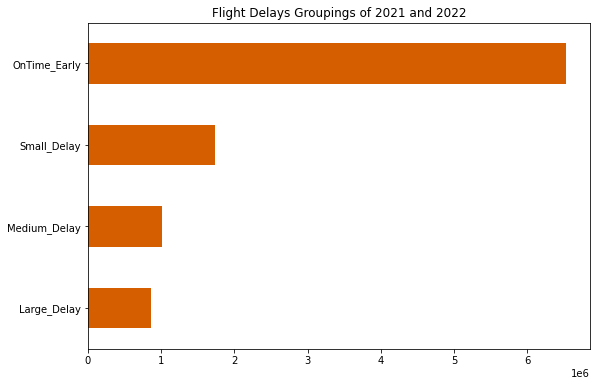

In [ ]:
df["DelayGroup"].value_counts(ascending=True).plot(kind="barh", figsize=(9, 6), color=pal[2], title="Flight Delays Groupings of 2021 and 2022")

plt.show()


In [ ]:
#A dataframe to store the delay groups
df["ArrDelayGroup"] = None

#Locating the arrival flights that are on-time
df.loc[df["ArrDelayMinutes"] == 0, "ArrDelayGroup"] = "OnTime_Early"

#Locating arrival flights that have small delay
df.loc[ (df["ArrDelayMinutes"] > 0) & (df["ArrDelayMinutes"] <= 15), "ArrDelayGroup"] = "Small_Delay"

#Locating arrival flights that have medium delay
df.loc[(df["ArrDelayMinutes"] > 15) & (df["ArrDelayMinutes"] <= 45), "ArrDelayGroup"] = "Medium_Delay"

#Extracting arrival flights that have large delay
df.loc[df["ArrDelayMinutes"] > 45, "ArrDelayGroup"] = "Large_Delay"

#Extracting arrival flights that are cancelled
df.loc[df["Cancelled"], "ArrDelayGroup"] = "Cancelled"

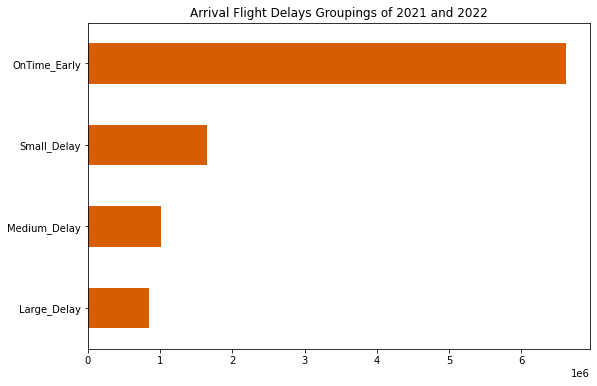

In [ ]:
df["ArrDelayGroup"].value_counts(ascending=True).plot(kind="barh", figsize=(9, 6), color=pal[2], title="Arrival Flight Delays Groupings of 2021 and 2022")

plt.show()


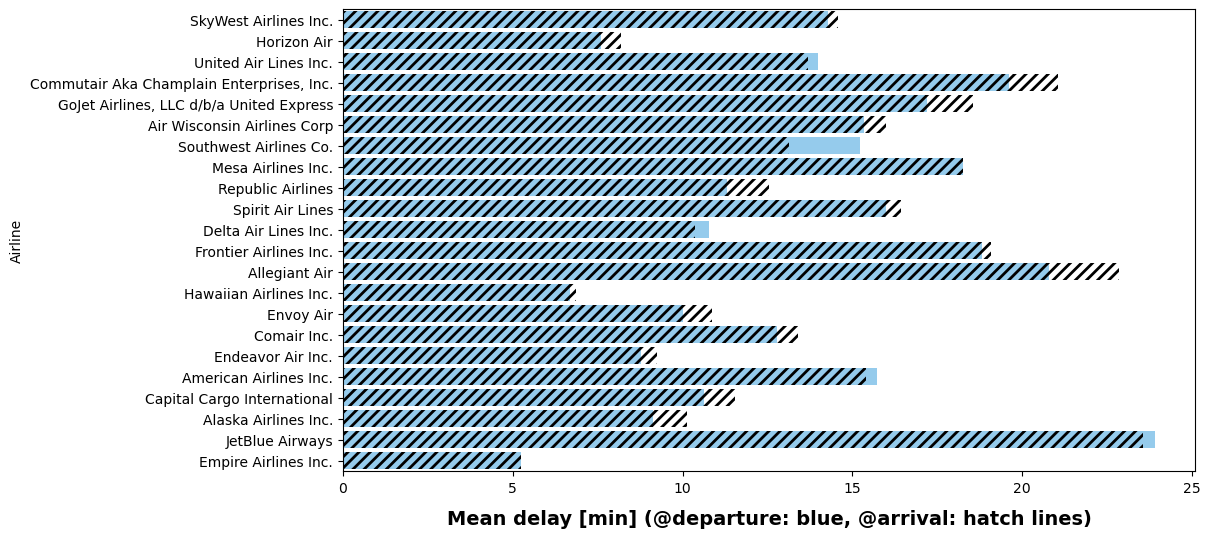

In [ ]:
import matplotlib as mpl
#from mpl_toolkits.basemap import Basemap
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DepDelayMinutes", y="Airline", data=df, color="lightskyblue", ci=None)
ax = sns.barplot(x="ArrDelayMinutes", y="Airline", data=df, color="r", hatch = '///',alpha = 0.0, ci=None)

plt.xlabel('Mean delay [min] (@departure: blue, @arrival: hatch lines)',fontsize=14, weight = 'bold', labelpad=10);

In [ ]:
df['Date'] = pd.to_datetime(df['FlightDate'], errors='coerce')


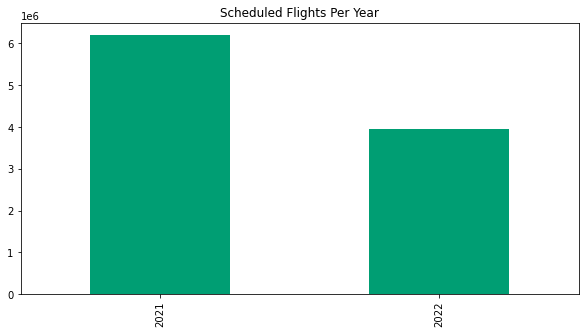

In [ ]:
df["Year"] = df['Date'].dt.year
df["Year"].value_counts().sort_index().plot(kind="bar", figsize=(10, 5), color = pal[1], title="Scheduled Flights Per Year")
plt.show()


In [ ]:
df["Year"] = df["Date"].dt.year
df_agg = df.groupby("Year")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay"]
df_agg[col_order].style.background_gradient(cmap="Blues")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay
Year,,,,
2021,66.916133,16.428942,9.064998,7.589927
2022,60.671457,18.254153,11.256742,9.817649


In [ ]:
df["Month"] = df["Date"].dt.month
df_agg = df.groupby("Month")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay"]
df_agg[col_order].style.background_gradient(cmap="Blues")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay
Month,,,,
1,72.421833,13.082707,7.574462,6.920997
2,68.387148,15.648472,8.704196,7.260184
3,68.242007,16.076619,8.743156,6.938218
4,67.570528,16.209090,8.889500,7.330882
5,65.390598,17.715773,9.385168,7.508460
6,57.450077,19.025605,12.149794,11.374524
7,57.477164,18.819394,12.141417,11.562025
8,59.818384,18.002797,11.463360,10.715459
9,70.664358,15.500325,7.838600,5.996716


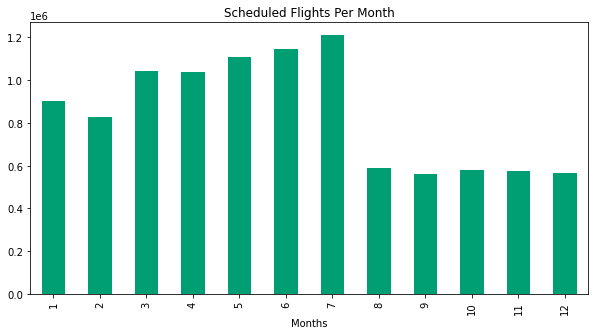

In [ ]:
#Monthly Analysis 
df["Month"].value_counts().sort_index().plot(kind="bar", figsize=(10, 5), color = pal[1], title="Scheduled Flights Per Month")
plt.xlabel("Months")
plt.show()

Airlines Analysis

Text(0.5, 0, '# of Flights (in hundred thousands)')

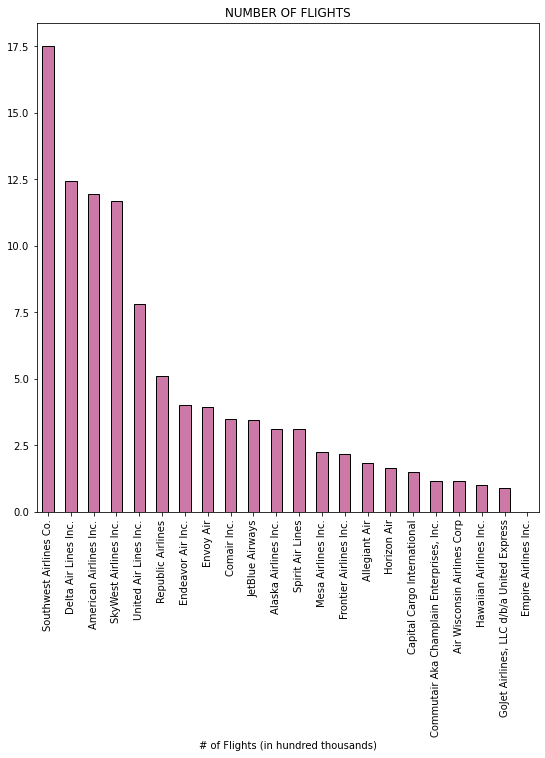

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))
airlines_ordered = (df["Airline"].value_counts(ascending=False) / 100_000).plot(kind="bar", color=pal[3], edgecolor="black",ax=ax)
ax.set_title("NUMBER OF FLIGHTS")
ax.set_xlabel("# of Flights (in hundred thousands)")

In [ ]:
df.head()

,FlightDate,Airline,Tail_Number,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,DelayGroup,Date,Year,Month
0,2021-03-03,SkyWest Airlines Inc.,N728SK,3133,SGU,PHX,False,False,724,714.0,0.0,14794,"St. George, UT",Utah,14107,"Phoenix, AZ",Arizona,10.0,5.0,843,818.0,0.0,OnTime_Early,2021-03-03,2021,3
1,2021-03-03,SkyWest Airlines Inc.,N752SK,3134,PHX,SGU,False,False,922,917.0,0.0,14107,"Phoenix, AZ",Arizona,14794,"St. George, UT",Utah,23.0,3.0,1040,1031.0,0.0,OnTime_Early,2021-03-03,2021,3
2,2021-03-03,SkyWest Airlines Inc.,N766SK,3135,MHT,ORD,False,False,1330,1321.0,0.0,13296,"Manchester, NH",New Hampshire,13930,"Chicago, IL",Illinois,15.0,16.0,1530,1501.0,0.0,OnTime_Early,2021-03-03,2021,3
3,2021-03-03,SkyWest Airlines Inc.,N752EV,3136,DFW,TRI,False,False,1645,1636.0,0.0,11298,"Dallas/Fort Worth, TX",Texas,15323,"Bristol/Johnson City/Kingsport, TN",Tennessee,27.0,7.0,2010,2002.0,0.0,OnTime_Early,2021-03-03,2021,3
4,2021-03-03,SkyWest Airlines Inc.,N715SK,3137,PHX,BFL,False,False,1844,1838.0,0.0,14107,"Phoenix, AZ",Arizona,10561,"Bakersfield, CA",California,13.0,3.0,1925,1903.0,0.0,OnTime_Early,2021-03-03,2021,3


In [ ]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

# Creation of a dataframe with statitical infos on each airline:
global_stats = df['DepDelayMinutes'].groupby(df['Airline']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats.style.background_gradient(cmap="spring_r")

,min,max,count,mean
Airline,,,,
Empire Airlines Inc.,0.000000,85.000000,112.000000,5.241071
"GoJet Airlines, LLC d/b/a United Express",0.000000,1653.000000,90163.000000,17.202500
Hawaiian Airlines Inc.,0.000000,1847.000000,102058.000000,6.699926
Air Wisconsin Airlines Corp,0.000000,1421.000000,116489.000000,15.343964
"Commutair Aka Champlain Enterprises, Inc.",0.000000,1464.000000,116608.000000,19.616201
Capital Cargo International,0.000000,1808.000000,148833.000000,10.630828
Horizon Air,0.000000,862.000000,164600.000000,7.587217
Allegiant Air,0.000000,1995.000000,182254.000000,20.776312
Frontier Airlines Inc.,0.000000,1335.000000,218926.000000,18.805240


In [ ]:
max_airlines = (df["Airline"].value_counts().reset_index().query("Airline > 1_000_000")["index"].values.tolist())

df_top_airlines = df.loc[df["Airline"].isin(max_airlines)].reset_index(drop=True).copy()

In [ ]:
# Reset airline categories
df_top_airlines["Airline"] = df_top_airlines["Airline"].astype("str").astype("category")

In [ ]:
df_top_airlines.head()

,FlightDate,Airline,Tail_Number,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,DelayGroup,Date,Year,Month
0,2021-03-03,SkyWest Airlines Inc.,N728SK,3133,SGU,PHX,False,False,724,714.0,0.0,14794,"St. George, UT",Utah,14107,"Phoenix, AZ",Arizona,10.0,5.0,843,818.0,0.0,OnTime_Early,2021-03-03,2021,3
1,2021-03-03,SkyWest Airlines Inc.,N752SK,3134,PHX,SGU,False,False,922,917.0,0.0,14107,"Phoenix, AZ",Arizona,14794,"St. George, UT",Utah,23.0,3.0,1040,1031.0,0.0,OnTime_Early,2021-03-03,2021,3
2,2021-03-03,SkyWest Airlines Inc.,N766SK,3135,MHT,ORD,False,False,1330,1321.0,0.0,13296,"Manchester, NH",New Hampshire,13930,"Chicago, IL",Illinois,15.0,16.0,1530,1501.0,0.0,OnTime_Early,2021-03-03,2021,3
3,2021-03-03,SkyWest Airlines Inc.,N752EV,3136,DFW,TRI,False,False,1645,1636.0,0.0,11298,"Dallas/Fort Worth, TX",Texas,15323,"Bristol/Johnson City/Kingsport, TN",Tennessee,27.0,7.0,2010,2002.0,0.0,OnTime_Early,2021-03-03,2021,3
4,2021-03-03,SkyWest Airlines Inc.,N715SK,3137,PHX,BFL,False,False,1844,1838.0,0.0,14107,"Phoenix, AZ",Arizona,10561,"Bakersfield, CA",California,13.0,3.0,1925,1903.0,0.0,OnTime_Early,2021-03-03,2021,3


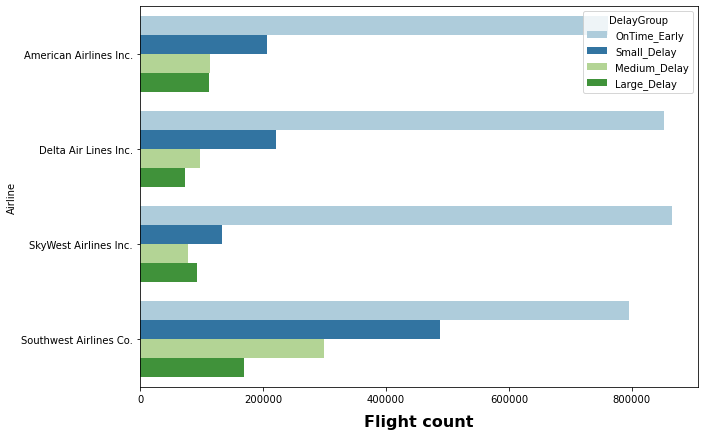

In [ ]:
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="Airline", hue='DelayGroup', data=df_top_airlines, palette = "Paired")
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)

plt.show()

Airport Analysis

In [ ]:
print("No. of airports: {}".format(len(df['Origin'].unique())))

No. of airports: 380


In [ ]:
airport_mean_delays = pd.DataFrame(pd.Series(df['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbr_companies.keys():
    df1 = df[df['Airline'] == carrier]
    test = df1['DEPARTURE_DELAY'].groupby(df['Origin']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean']